# MaxQuant Handler (mqhandler package)

In this tutorial, we will show how to use the different functionalities of the mqhandler. The mqhandler package comprises 4 functionalities:
- filter protein IDs
- remap gene names
- reduce gene names
- map orthologs


## Install package

First of all, the mqhandler package needs to be installed.

In [3]:
import sys
!{sys.executable} -m pip install mqhandler==0.0.19

  Using cached mqhandler-0.0.19.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached httplib2-0.21.0-py3-none-any.whl (96 kB)
  Created wheel for mqhandler: filename=mqhandler-0.0.19-py3-none-any.whl size=386266 sha256=7f528ad13992c4d4c1947931ab3c3b08b7c630743764a97109d6fa403d64fdc4
  Stored in directory: /Users/lisiarend/Library/Caches/pip/wheels/fe/52/19/04827bf710f55e4b00e259e5a74d3d90752e810f3f34485d14
Successfully built mqhandler
  Attempting uninstall: httplib2
    Found existing installation: httplib2 0.20.4
    Uninstalling httplib2-0.20.4:
      Successfully uninstalled httplib2-0.20.4
  Attempting uninstall: mqhandler
    Found existing installation: mqhandler 0.0.12
    Uninstalling mqhandler-0.0.12:
      Successfully uninstalled mqhandler-0.0.12
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.


In [4]:
from importlib.metadata import version
version('mqhandler')

'0.0.19'

## Run mqhandler

The mqhandler package comprises 4 functionalities:
- filter protein ids
- remap gene names
- reduce gene names
- map orthologs

In this tutorial, we will first load the data into a pandas dataframe. Then, the protein ids will be filtered, the gene names remapped and reduced to gene names having an Ensembl ID. Finally, we will map the gene names to human orthologs.

### 1. Load Data

In order to use the mqhandler functionalities, you need to load your data into a pandas dataframe. This could be a MaxQuant proteinGroups.txt output, a single column with protein IDs or any other matrix with a column of ids/gene names.

In this tutorial, we will use proteomics data processed with MaxQuant.

#### 1.1 Imports

In [5]:
import pandas as pd
from mqhandler.mq_utils.runner_utils import find_delimiter

#### 1.2 Specify File Path

In [6]:
file = "/Users/lisiarend/Desktop/Hiwi/proteomics_analysis/data/TMT_data/rat_plasma_diabetic/proteinGroups.txt"

#### 1.3 Load Your Data

In [7]:
data = pd.read_table(file, sep=find_delimiter(file)).fillna("")
data.head(5)

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
0,A0A096MIU4;A0A0G2JXF3;Q4KLY0,A0A096MIU4;A0A0G2JXF3;Q4KLY0,1;1;1,1;1;1,1;1;1,Centrosomal protein of 63 kDa,Cep63,Cep63;Cep63;Cep63,3,1,...,,0,4593,True,5107,82477;82478;82479;82480;82481;82482;82483;8248...,83043;83044;83045;83046;83047;83048,83044,0,130
1,A0A096MJJ4,A0A096MJJ4,1,1,1,,Cfap58,Cfap58,1,1,...,,1,6151,True,6824,112877;112878;112879,113370;113371,113370,1,460
2,A0A0G2K296;A0A096MJX4,A0A0G2K296;A0A096MJX4,1;1,1;1,1;1,,Fsip2,Fsip2;Fsip2,2,1,...,,2,6164,True,6839,113115;113116;113117;113118;113119;113120;1131...,113590;113591;113592;113593;113594;113595;1135...,113592,2;3,2856;2859
3,A0A096MJY6,A0A096MJY6,4,2,2,,Gbe1,Gbe1,1,4,...,,3,24;32;1921;3118,True;True;False;False,24;32;2121;3432,571;642;643;644;35177;56730,615;670;671;672;35510;57516,615;670;35510;57516,,
4,A0A096MK00,A0A096MK00,1,1,1,,,LOC103695128,1,1,...,,4,1683,True,1850,30384;30385;30386;30387;30388;30389,30193;30194,30194,,


### 2. Filter Protein IDs

The MaxQuant output occasionally may contain proteins from other species or decoy names. The **filter protein IDs** method has been developed for this. It can filter the protein ids by organism, by decoy names, and by reviewed status.


First you need to import the method from the mqhandler package. Following the specification of a few parameters, the method can be called. The selected protein column is filtered and a new dataframe is returned. Additionally, a log dictionary of two dataframes is returned containing the protein IDs that have been eliminated. Finally, additional functions are provided to visualize the amount of elimiated proteins as well as the reasons for their deletion.

#### 2.1 Imports

In [8]:
from mqhandler import filter_ids as fi

#### 2.2 Set Preferences

In [9]:
organism = "rat" # Specify organism the IDs should match to
protein_column = "Protein IDs" # Name of column with protein IDs
decoy = False # Bool to indicate if protein IDs from decoy fasta (REV__,CON__) should be kept
reviewed = False # Bool to indicate if newly retrieved protein IDS should be reduced to reviewed ones
keep_empty = False # Bool to indicate if empty ID cells should be kept or deleted
return_log = True # Bool to indicate if a dictionary of logging dataframes should be returned

#### 2.2 Run filter_protein_ids

In [10]:
fi_data, fi_log_dict = fi.filter_protein_ids(data = data, protein_column = protein_column, 
                                             organism = organism, decoy = decoy, keep_empty = keep_empty, 
                                             reviewed = reviewed, return_log = return_log)
fi_data.head(5)

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
0,Q4KLY0;A0A0G2JXF3;A0A096MIU4,A0A096MIU4;A0A0G2JXF3;Q4KLY0,1;1;1,1;1;1,1;1;1,Centrosomal protein of 63 kDa,Cep63,Cep63;Cep63;Cep63,3,1,...,,0,4593,True,5107,82477;82478;82479;82480;82481;82482;82483;8248...,83043;83044;83045;83046;83047;83048,83044,0,130
1,A0A096MJJ4,A0A096MJJ4,1,1,1,,Cfap58,Cfap58,1,1,...,,1,6151,True,6824,112877;112878;112879,113370;113371,113370,1,460
2,A0A096MJX4;A0A0G2K296,A0A0G2K296;A0A096MJX4,1;1,1;1,1;1,,Fsip2,Fsip2;Fsip2,2,1,...,,2,6164,True,6839,113115;113116;113117;113118;113119;113120;1131...,113590;113591;113592;113593;113594;113595;1135...,113592,2;3,2856;2859
3,A0A096MJY6,A0A096MJY6,4,2,2,,Gbe1,Gbe1,1,4,...,,3,24;32;1921;3118,True;True;False;False,24;32;2121;3432,571;642;643;644;35177;56730,615;670;671;672;35510;57516,615;670;35510;57516,,
4,A0A096MK00,A0A096MK00,1,1,1,,,LOC103695128,1,1,...,,4,1683,True,1850,30384;30385;30386;30387;30388;30389,30193;30194,30194,,


#### 2.3 Inspect Logging

In [11]:
# TODO

### 3. Remap Gene Names

After filtering the protein ids, some ids have been removed but possibly their corresponding gene names remain in the gene name column of the MaxQuant output. Additionally, the gene name column for a specific protein group is empty but rather needed for downstream analysis such as Gene Set Enrichment Analysis (GSEA). For this, the function **remap gene names** has been created. 

Again, you need to import the mqhandler's function and specify some preferences before running the method. The selected gene name column is remapped based on the protein ids column that has been specified. A dataframe including the remapped gene name column and all other columns of the original data is returned. Additionally, a log dictionary of two dataframes is returned containing the gene names that have been remapped. Finally, additional functions are provided to visualize the amount of remapped gene names.

In this tutorial, we will call the remap gene names function on the data that has already been processed using the filter IDs method. 

#### 3.1 Imports

In [12]:
from mqhandler import remap_genenames as rmg

#### 3.2 Set Preferences

In [13]:
mode = "uniprot_primary" # Mode of refilling. See below for more infos.
protein_column = "Protein IDs" # Name of column with protein IDs
gene_column = "Gene names" # Name of column with gene names
skip_filled = False # Bool to indicate if already filled gene names should be skipped
organism = "rat" # Specify organism the IDs should match to
fasta = None # Path of Fasta file when mode all or fasta
keep_empty = False # Bool to indicate if empty gene names cells should be kept or deleted
res_column = None # Name of column for remap genenames results. If None, the gene_column will be overridden
return_log = True # Bool to indicate if a dictionary of logging dataframes should be returned

**Modes of refilling:**
- all : Use primarly fasta infos and additionally uniprot infos.
- fasta: Use information extracted from fasta headers.
- uniprot: Use mapping information from uniprot and use all gene names.
- uniprot_primary: Use mapping information from uniprot and only all primary gene names.
- uniprot_one: Use mapping information from uniprot and only use most frequent single gene name.

#### 3.3 Run remap_genenames

In [15]:
rmg_data, rmg_log_dict = rmg.remap_genenames(data = fi_data, mode=mode, protein_column = protein_column,
                                            gene_column = gene_column, skip_filled = skip_filled, organism = organism, 
                                             fasta = fasta, keep_empty = keep_empty, res_column = res_column, 
                                             return_log = return_log)
rmg_data.head(5)

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
0,Q4KLY0;A0A0G2JXF3;A0A096MIU4,A0A096MIU4;A0A0G2JXF3;Q4KLY0,1;1;1,1;1;1,1;1;1,Centrosomal protein of 63 kDa,Cep63,Cep63;Cep63;Cep63,3,1,...,,0,4593,True,5107,82477;82478;82479;82480;82481;82482;82483;8248...,83043;83044;83045;83046;83047;83048,83044,0,130
1,A0A096MJJ4,A0A096MJJ4,1,1,1,,Cfap58,Cfap58,1,1,...,,1,6151,True,6824,112877;112878;112879,113370;113371,113370,1,460
2,A0A096MJX4;A0A0G2K296,A0A0G2K296;A0A096MJX4,1;1,1;1,1;1,,Fsip2,Fsip2;Fsip2,2,1,...,,2,6164,True,6839,113115;113116;113117;113118;113119;113120;1131...,113590;113591;113592;113593;113594;113595;1135...,113592,2;3,2856;2859
3,A0A096MJY6,A0A096MJY6,4,2,2,,Gbe1,Gbe1,1,4,...,,3,24;32;1921;3118,True;True;False;False,24;32;2121;3432,571;642;643;644;35177;56730,615;670;671;672;35510;57516,615;670;35510;57516,,
4,A0A096MK00,A0A096MK00,1,1,1,,ENSRNOG00000070672,LOC103695128,1,1,...,,4,1683,True,1850,30384;30385;30386;30387;30388;30389,30193;30194,30194,,


#### 3.4 Inspect Logging

The **filter protein ids** method returns (as all the other methods too) a dictionary of two dataframes containing logging information. Under "Overview_Log", a basic overview dataframe is accessible containing the number of removed ids per row. With this dataframe, the function **create_overview_plot** can be called to visualize the distribution of the number of entries per line that have been removed. Additionally, the logging dictionary saves a dataframe with information about the cause of filtering under "Detailed_Log". With this dataframe, the function ""create_filter_detailed_plot" can be executed to visual

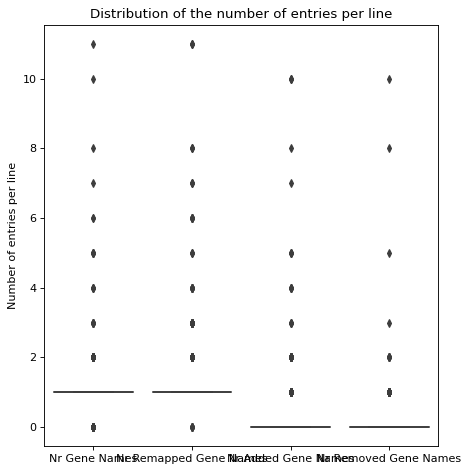

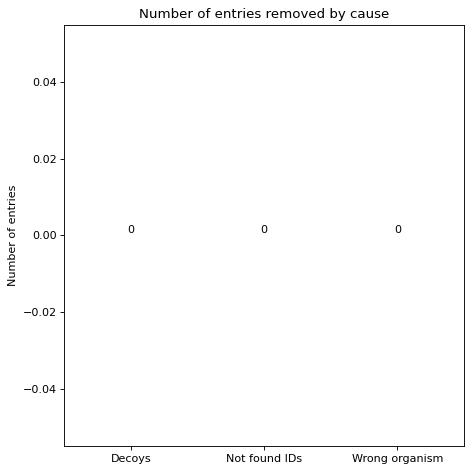

In [33]:
from mqhandler.mq_utils import plotting as pt
out_dir = "/Users/lisiarend/Desktop/"
pt.create_overview_plot(logging = rmg_log_dict["Overview_Log"], out_dir=out_dir)
pt.create_filter_detailed_plot(logging = rmg_log_dict["Detailed_Log"], organism = organism, reviewed = reviewed, decoy = decoy, out_dir = out_dir)

### 4. Reduce Gene Names

#### 4.1 Imports

In [17]:
from mqhandler import reduce_genenames as rdg

#### 4.2 Set Preferences

In [18]:
mode = "ensembl" # Mode of reduction. See below for more infos-
gene_column = "Gene names" # Name of column with gene names
organism = "rat" # Specify organism the IDs should match to
res_column = False # Name of column of reduced gene names results. If None, the gene_column will be overridden
keep_empty = False # Bool to indicate if empty reduced gene names cells should be kept or deleted
HGNC_mode = None # Mode on how to selected the gene names in HGNC (mostfrequent, all)
return_log = True # Bool to indicate if a dictionary of logging dataframes should be kept

**Modes of reduction:**
- ensembl : Use gProfiler to reduce gene names to those having a Ensembl ID
- HGNC: Use HGNC database to reduce gene names to those having an entry in HGNC (only for human)
- mygeneinfo: Use mygeneinfo database to reduce gene names to those having an entry in mygeneinfo
- enrichment: Use gProfiler to reduce gene names to those having a functional annotation

#### 4.3 Run reduce_genenames

In [20]:
rdg_data, rdg_log_dict = rdg.reduce_genenames(data = rmg_data, mode = mode, gene_column = gene_column, 
                                              organism = organism, res_column = res_column, keep_empty = keep_empty,
                                             HGNC_mode = HGNC_mode, return_log = return_log)
rdg_data.head(5)

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,False
0,Q4KLY0;A0A0G2JXF3;A0A096MIU4,A0A096MIU4;A0A0G2JXF3;Q4KLY0,1;1;1,1;1;1,1;1;1,Centrosomal protein of 63 kDa,Cep63,Cep63;Cep63;Cep63,3,1,...,0,4593,True,5107,82477;82478;82479;82480;82481;82482;82483;8248...,83043;83044;83045;83046;83047;83048,83044,0,130,Cep63
1,A0A096MJJ4,A0A096MJJ4,1,1,1,,Cfap58,Cfap58,1,1,...,1,6151,True,6824,112877;112878;112879,113370;113371,113370,1,460,Cfap58
2,A0A096MJX4;A0A0G2K296,A0A0G2K296;A0A096MJX4,1;1,1;1,1;1,,Fsip2,Fsip2;Fsip2,2,1,...,2,6164,True,6839,113115;113116;113117;113118;113119;113120;1131...,113590;113591;113592;113593;113594;113595;1135...,113592,2;3,2856;2859,Fsip2
3,A0A096MJY6,A0A096MJY6,4,2,2,,Gbe1,Gbe1,1,4,...,3,24;32;1921;3118,True;True;False;False,24;32;2121;3432,571;642;643;644;35177;56730,615;670;671;672;35510;57516,615;670;35510;57516,,,Gbe1
4,A0A096MK00,A0A096MK00,1,1,1,,ENSRNOG00000070672,LOC103695128,1,1,...,4,1683,True,1850,30384;30385;30386;30387;30388;30389,30193;30194,30194,,,ENSRNOG00000070672


#### 4.4 Inspect Logging

In [21]:
#TODO

### 5. Map Orthologs

#### 5.1 Imports

In [22]:
from mqhandler import map_orthologs as mo

#### 5.2 Set Preferences

In [23]:
gene_column = "Gene names" # Name of column with gene names
organism = "rat" # Specify organism the IDs match to
tar_organism = "human" # Specify organism the IDs should me mapped to
keep_empty = False # Bool to indicate if empty ortholog gene names cells should be kept or deleted
res_column = None # Name of column of orthologs gene names results. If None, the gene_column will be overridden
return_log = True # Bool to indicate if a dictionary of logging dataframes should be kept

#### 5.3 Run reduce_genenames

In [26]:
mo_data, mo_logging_dict = mo.map_orthologs(data = data, gene_column = gene_column, organism = organism,
                                           tar_organism = tar_organism, keep_empty = keep_empty, 
                                            res_column = res_column, return_log = return_log)
mo_data.head(5)

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
0,A0A096MIU4;A0A0G2JXF3;Q4KLY0,A0A096MIU4;A0A0G2JXF3;Q4KLY0,1;1;1,1;1;1,1;1;1,Centrosomal protein of 63 kDa,CEP63,Cep63;Cep63;Cep63,3,1,...,,0,4593,True,5107,82477;82478;82479;82480;82481;82482;82483;8248...,83043;83044;83045;83046;83047;83048,83044,0,130
1,A0A096MJJ4,A0A096MJJ4,1,1,1,,CFAP58,Cfap58,1,1,...,,1,6151,True,6824,112877;112878;112879,113370;113371,113370,1,460
2,A0A0G2K296;A0A096MJX4,A0A0G2K296;A0A096MJX4,1;1,1;1,1;1,,FSIP2,Fsip2;Fsip2,2,1,...,,2,6164,True,6839,113115;113116;113117;113118;113119;113120;1131...,113590;113591;113592;113593;113594;113595;1135...,113592,2;3,2856;2859
3,A0A096MJY6,A0A096MJY6,4,2,2,,GBE1,Gbe1,1,4,...,,3,24;32;1921;3118,True;True;False;False,24;32;2121;3432,571;642;643;644;35177;56730,615;670;671;672;35510;57516,615;670;35510;57516,,
4,A0A096MK00,A0A096MK00,1,1,1,,N/A,LOC103695128,1,1,...,,4,1683,True,1850,30384;30385;30386;30387;30388;30389,30193;30194,30194,,


#### 5.4 Inspect Logging

In [ ]:
#TODO